<a href="https://colab.research.google.com/github/TatyanaLanceva/Netology/blob/main/5_7_Statistics_in_Python_final_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1
Для работы используйте набор данных “Global YouTube Statistics.csv”, приложенный к материалам занятия.

Описание датасета:

    rank: Position of the YouTube channel based on the number of subscribers
    Youtuber: Name of the YouTube channel
    subscribers: Number of subscribers to the channel
    video views: Total views across all videos on the channel
    category: Category or niche of the channel
    Title: Title of the YouTube channel
    uploads: Total number of videos uploaded on the channel
    Country: Country where the YouTube channel originates
    Abbreviation: Abbreviation of the country
    channel_type: Type of the YouTube channel (e.g., individual, brand)
    video_views_rank: Ranking of the channel based on total video views
    country_rank: Ranking of the channel based on the number of subscribers within its country
    channel_type_rank: Ranking of the channel based on its type (individual or brand)
    video_views_for_the_last_30_days: Total video views in the last 30 days
    lowest_monthly_earnings: Lowest estimated monthly earnings from the channel
    highest_monthly_earnings: Highest estimated monthly earnings from the channel
    lowest_yearly_earnings: Lowest estimated yearly earnings from the channel
    highest_yearly_earnings: Highest estimated yearly earnings from the channel
    subscribers_for_last_30_days: Number of new subscribers gained in the last 30 days
    created_year: Year when the YouTube channel was created
    created_month: Month when the YouTube channel was created
    created_date: Exact date of the YouTube channel’s creation
    Gross tertiary education enrollment (%): Percentage of the population enrolled in tertiary education in the country
    Population: Total population of the country
    Unemployment rate: Unemployment rate in the country
    Urban_population: Percentage of the population living in urban areas
    Latitude: Latitude coordinate of the country’s location
    Longitude: Longitude coordinate of the country’s location

Задание 1. EDA
Проведите разведывательный анализ данных (EDA).

    Задайте не менее 6 вопросов к данным и постарайтесь ответить на них, используя визуализацию.
    Изобразите матрицу корреляций для нахождения взаимосвязей.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
df = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='ISO-8859-1')
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [ ]:
df.describe() # выведем описательные статистики

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


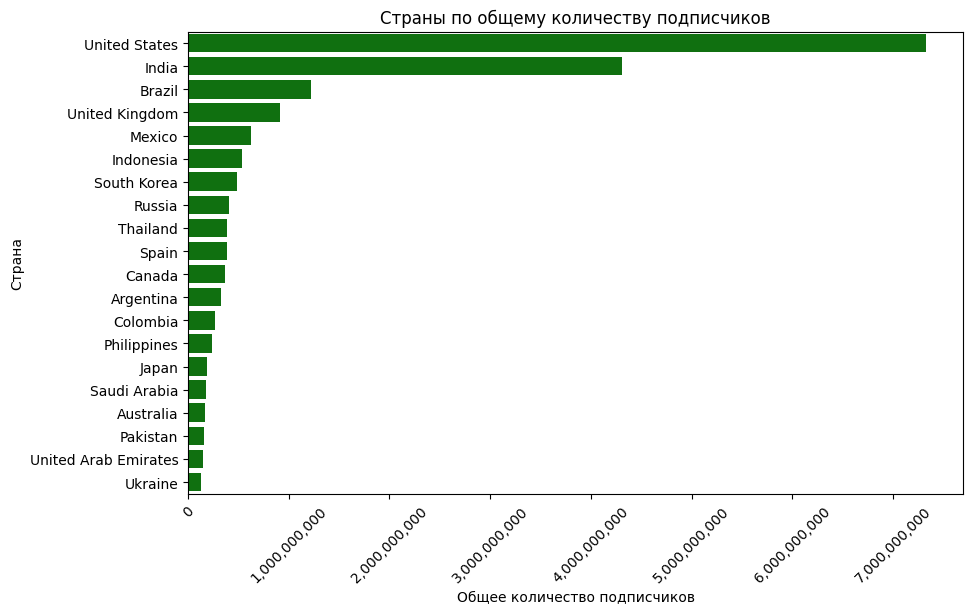

In [ ]:
# Рассмотрим, какие страны имеют наибольшее количество популярных каналов.
# Преобразуем числовые значения подписчиков
df.loc[:, 'subscribers'] = pd.to_numeric(df['subscribers'], errors='coerce').astype(int)
# Группируем страны по количеству подписчиков
top_countries = df.groupby("Country")["subscribers"].sum().sort_values(ascending=False).head(20)
major_formatter = matplotlib.ticker.StrMethodFormatter('{x:,.0f}')
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, color='green')
plt.title('Страны по общему количеству подписчиков')
plt.xlabel('Общее количество подписчиков')
plt.ylabel('Страна')
plt.gca().xaxis.set_major_formatter(major_formatter)
plt.xticks(rotation=45)
plt.show()

Максимальное число подписчиков в США, далее идет Индия, Китай, Бразилия и Великобритания.  

In [ ]:
# Для дополнительныйх вопросов поработаем с данными, сократим количество столбцов на вывод, чтобы проще было работать
selected_columns = ['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'uploads', 'Country', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'created_year', 'Population']
df1 = df[selected_columns]
df1

,rank,Youtuber,subscribers,video views,category,uploads,Country,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,created_year,Population
0,1,T-Series,245000000,2.280000e+11,Music,20082,India,2.258000e+09,564600.0,9000000.00,2006.0,1.366418e+09
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,United States,1.200000e+01,0.0,0.05,2006.0,3.282395e+08
2,3,MrBeast,166000000,2.836884e+10,Entertainment,741,United States,1.348000e+09,337000.0,5400000.00,2012.0,3.282395e+08
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,1.975000e+09,493800.0,7900000.00,2006.0,3.282395e+08
4,5,SET India,159000000,1.480000e+11,Shows,116536,India,1.824000e+09,455900.0,7300000.00,2006.0,1.366418e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,1200,Brazil,5.525130e+08,138100.0,2200000.00,2017.0,2.125594e+08
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,1500,India,6.473500e+07,16200.0,258900.00,2018.0,1.366418e+09
992,993,Panda,12300000,2.214684e+09,NaN,2452,United Kingdom,6.703500e+04,17.0,268.00,2006.0,6.683440e+07
993,994,RobTopGames,12300000,3.741235e+08,Gaming,39,Sweden,3.871000e+06,968.0,15500.00,2012.0,1.028545e+07


In [ ]:
df1.info() # Проверим значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rank                              995 non-null    int64  
 1   Youtuber                          995 non-null    object 
 2   subscribers                       995 non-null    int64  
 3   video views                       995 non-null    float64
 4   category                          949 non-null    object 
 5   uploads                           995 non-null    int64  
 6   Country                           873 non-null    object 
 7   video_views_for_the_last_30_days  939 non-null    float64
 8   lowest_monthly_earnings           995 non-null    float64
 9   highest_monthly_earnings          995 non-null    float64
 10  created_year                      990 non-null    float64
 11  Population                        872 non-null    float64
dtypes: float

In [ ]:
# Проверим пропущенные значения:
total_rows = len(df1)
missing_values = df1.isna().sum()
percent_missing = (missing_values / total_rows * 100).round(2)
missing_report = pd.concat([missing_values, percent_missing], axis=1, keys=['Количество пропущенных', '% Пропущенных'])
sorted_missing_report = missing_report.sort_values(by='% Пропущенных', ascending=False)
print(sorted_missing_report)

                                  Количество пропущенных  % Пропущенных
Population                                           123          12.36
Country                                              122          12.26
video_views_for_the_last_30_days                      56           5.63
category                                              46           4.62
created_year                                           5           0.50
rank                                                   0           0.00
Youtuber                                               0           0.00
subscribers                                            0           0.00
video views                                            0           0.00
uploads                                                0           0.00
lowest_monthly_earnings                                0           0.00
highest_monthly_earnings                               0           0.00


In [ ]:
# Поработаем с пропусками
df1['Population'].fillna(df1['Population'].mean(), inplace=True) # Заменим на среднее население

In [ ]:
most_common_category = df1['category'].value_counts().index[0] # Заменим модой категории
df1['category'].fillna(most_common_category, inplace=True)

In [ ]:
df1.dropna(subset=['created_year'], inplace=True) # Учитывая малый процент пропусков удалим пропущенные значения

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 994
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rank                              990 non-null    int64  
 1   Youtuber                          990 non-null    object 
 2   subscribers                       990 non-null    int64  
 3   video views                       990 non-null    float64
 4   category                          990 non-null    object 
 5   uploads                           990 non-null    int64  
 6   Country                           870 non-null    object 
 7   video_views_for_the_last_30_days  939 non-null    float64
 8   lowest_monthly_earnings           990 non-null    float64
 9   highest_monthly_earnings          990 non-null    float64
 10  created_year                      990 non-null    float64
 11  Population                        990 non-null    float64
dtypes: float64(6)

In [ ]:
columns_to_convert = ['video views', 'video_views_for_the_last_30_days', 'Population'] # Поправим числовые значения для наглядности
df1[columns_to_convert] = df1[columns_to_convert].fillna(0)
df1[columns_to_convert] = df1[columns_to_convert].astype(int)

In [ ]:
df1['created_year'] = pd.to_datetime(df1['created_year'], format='%Y') # Поправим год
df1['created_year'] = df1['created_year'].dt.year

In [ ]:
df1

,rank,Youtuber,subscribers,video views,category,uploads,Country,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,created_year,Population
0,1,T-Series,245000000,228000000000,Music,20082,India,2258000000,564600.0,9000000.00,2006,1366417754
1,2,YouTube Movies,170000000,0,Film & Animation,1,United States,12,0.0,0.05,2006,328239523
2,3,MrBeast,166000000,28368841870,Entertainment,741,United States,1348000000,337000.0,5400000.00,2012,328239523
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,966,United States,1975000000,493800.0,7900000.00,2006,328239523
4,5,SET India,159000000,148000000000,Shows,116536,India,1824000000,455900.0,7300000.00,2006,1366417754
...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9029609749,Sports,1200,Brazil,552513000,138100.0,2200000.00,2017,212559417
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,1500,India,64735000,16200.0,258900.00,2018,1366417754
992,993,Panda,12300000,2214684303,Entertainment,2452,United Kingdom,67035,17.0,268.00,2006,66834405
993,994,RobTopGames,12300000,374123483,Gaming,39,Sweden,3871000,968.0,15500.00,2012,10285453


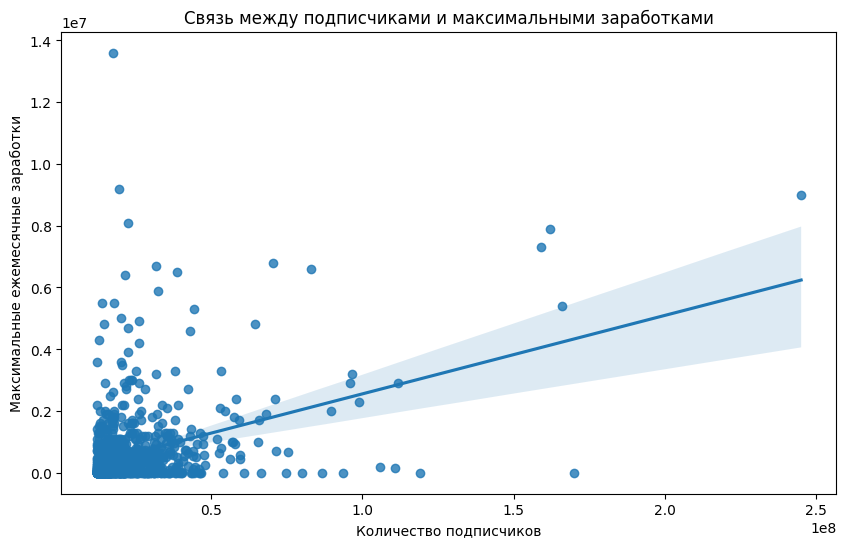

In [ ]:
# Посмотрим связь между подписчиками и максимальными заработками
plt.figure(figsize=(10, 6))
sns.regplot(x='subscribers', y='highest_monthly_earnings', data=df1)
plt.xlabel('Количество подписчиков')
plt.ylabel('Максимальные ежемесячные заработки')
plt.title('Связь между подписчиками и максимальными заработками')
plt.show()

Мы не можем однозначно сказать, что есть связь между количеством подписчиков и максимальными заработками по графику.

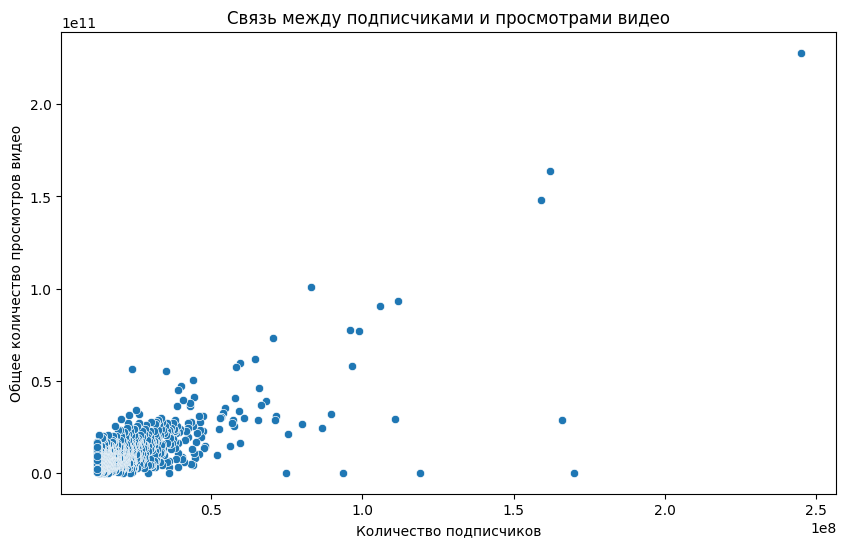

In [ ]:
plt.figure(figsize=(10, 6)) # Проверим связь между подписчиками и просмотрами видео
sns.scatterplot(x='subscribers', y='video views', data=df)
plt.xlabel('Количество подписчиков')
plt.ylabel('Общее количество просмотров видео')
plt.title('Связь между подписчиками и просмотрами видео')
plt.show()

Здесь мы также не можем визуально выделить четкую связь, большая концентрация значений вблизи минимальных.

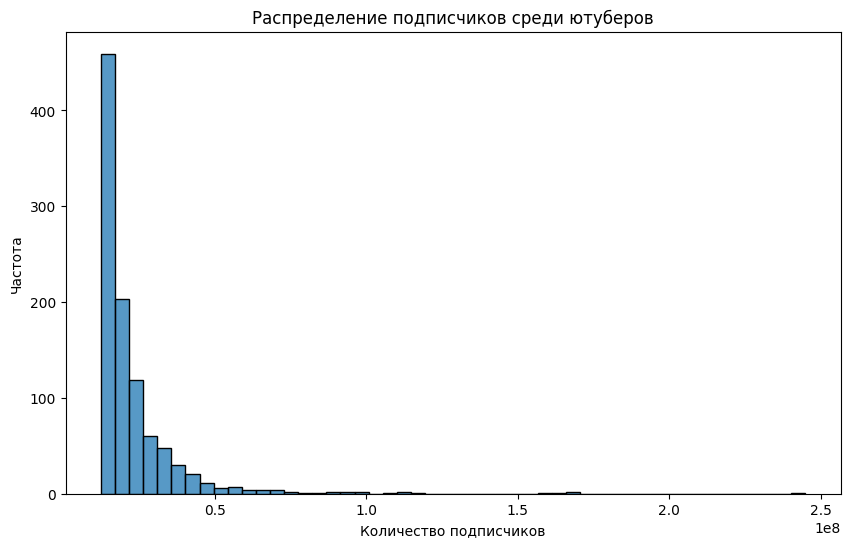

In [ ]:
# Гистограмма распределения подписчиков среди ютьюберов
plt.figure(figsize=(10, 6))
sns.histplot(df['subscribers'], bins=50)
plt.xlabel('Количество подписчиков')
plt.ylabel('Частота')
plt.title('Распределение подписчиков среди ютуберов')
plt.show()

Мы получили гистограмму с аномально высоким краем, причиной является то, что большинство наблюдей у нас сосредоточено вблизи минимального значения. Такое распределение показывает сложность набора подписчиков.

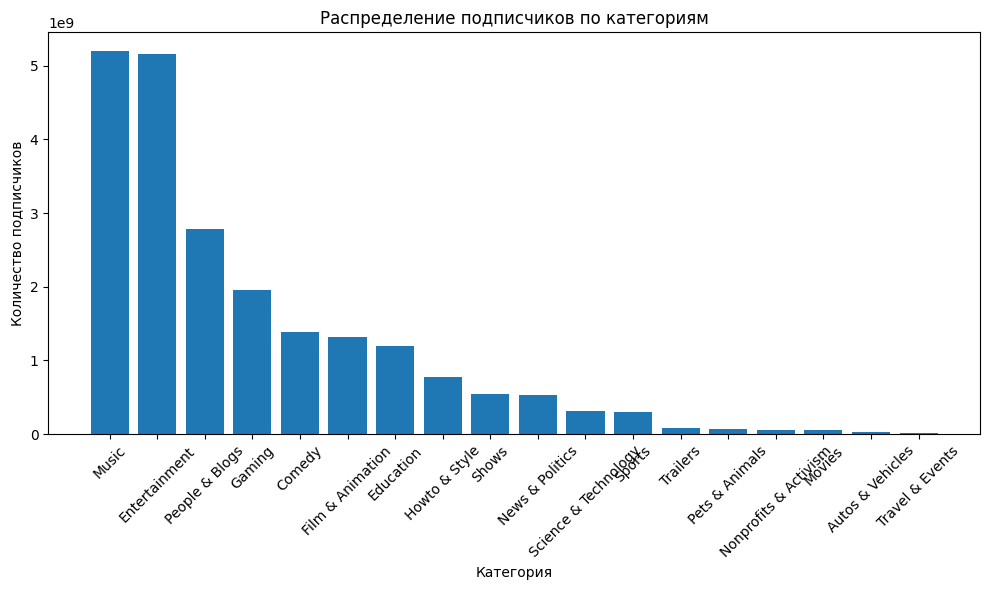

In [ ]:
# Проверим, какая категория YouTube-каналов имеет больше всего суммарных подписчиков
category_subscribers = df.groupby('category')['subscribers'].sum()
sorted_categories = category_subscribers.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(sorted_categories.index, sorted_categories.values)
plt.xlabel('Категория')
plt.ylabel('Количество подписчиков')
plt.title('Распределение подписчиков по категориям')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Наиболее популярные категории каналов это музыка, развлечения, люди и блоги, игры.

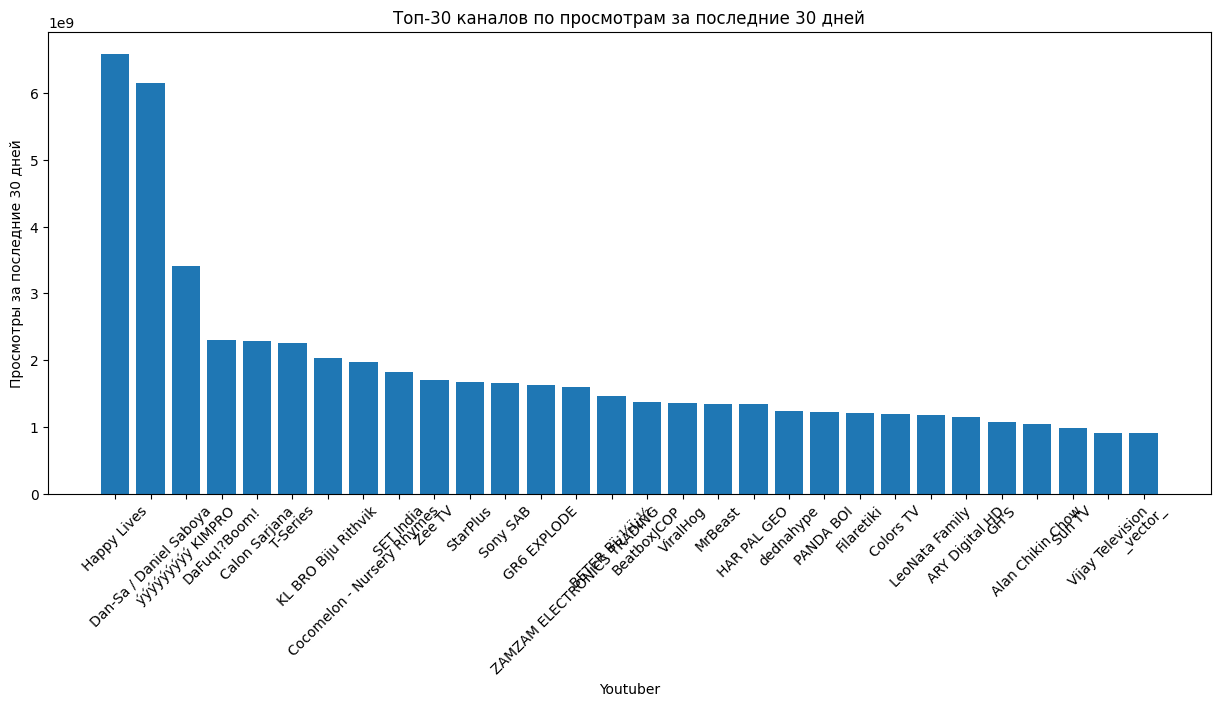

In [ ]:
# Какие каналы были самыми популярными за последние 30 дней.
top_30_channels = df.sort_values(by='video_views_for_the_last_30_days', ascending=False).head(30)
plt.figure(figsize=(15, 6))
plt.bar(top_30_channels['Youtuber'], top_30_channels['video_views_for_the_last_30_days'])
plt.xlabel('Youtuber')
plt.ylabel('Просмотры за последние 30 дней')
plt.title('Топ-30 каналов по просмотрам за последние 30 дней')
plt.xticks(rotation=45)
plt.show()

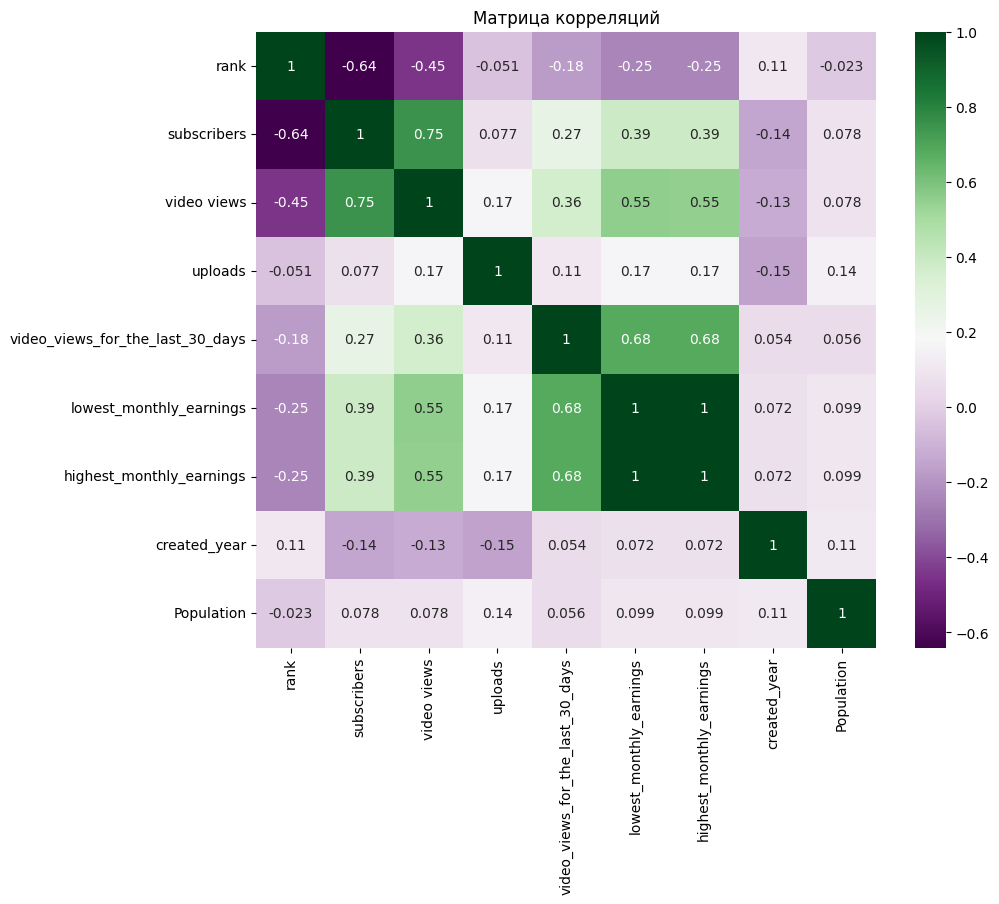

In [ ]:
# Составим матрицу корреляции значений
# Отбираем только числовые столбцы
numeric_cols = df1.select_dtypes(include=[np.number]).columns
corr = df1[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='PRGn')
plt.title('Матрица корреляций')
plt.show()

По матрице корреляции можно сделать следующие выводы: корреляция между подписчиками (subscribers) и рангом (rank) коэффициент равен - 0,64. Это указывает на умеренную отрицательную корреляцию. Чем выше число подписчиков у канала, тем ниже его ранг (чем меньше число, тем выше место в рейтинге). Это логично, так как обычно каналы с большим числом подписчиков занимают более высокие позиции в рейтингах.
Корреляция между подписчиками (subscribers) и просмотрами видео (video_views_rank) - коэффициент 0,75. Положительная корреляция показывает прямую зависимость: чем больше подписчиков у канала, тем больше просмотров его видео получают. Это также вполне ожидаемо, поскольку большее количество подписчиков часто приводит к большему числу просмотров.

# Задание 2. Корреляционный анализ

    Оставьте два коррелирующих столбца: "subscribers" и"video views".
    Отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
    Рассчитайте коэффициент корреляции Пирсона.
    Определите "video views" как признак Х, а "subscribers" - как целевую переменную.
    Разделите выборку на тестовую и тренировочную.
    Постройте модель линейной регрессии.
    Рассчитайте точность модели на тестовой выборке.

    Как изменится точность, если опустить пункт 2 и не убирать из данных нулевые просмотры?


In [ ]:
# Оставляем только столбцы "subscribers" и "video views"
df2 = df[['subscribers', 'video views']]
df2

,subscribers,video views
0,245000000,2.280000e+11
1,170000000,0.000000e+00
2,166000000,2.836884e+10
3,162000000,1.640000e+11
4,159000000,1.480000e+11
...,...,...
990,12300000,9.029610e+09
991,12300000,1.674410e+09
992,12300000,2.214684e+09
993,12300000,3.741235e+08


In [ ]:
df3 = df2.dropna(subset=['subscribers', 'video views']) # Уберем значение NaN

In [ ]:
df3 = (df2['subscribers'] != 0) & (df2['video views'] != 0) # Убираем нули, кол-во значений уменьшилось с 995 до 987
df3 = df2[mask]

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 987 entries, 0 to 994
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subscribers  987 non-null    int64  
 1   video views  987 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 23.1 KB


In [ ]:
# Рассчитаем коэффициент корреляции Пирсона
correlation = df3['subscribers'].corr(df3['video views'], method='pearson')
print(f"Коэффициент корреляции Пирсона: {correlation:.2f}")

Коэффициент корреляции Пирсона: 0.82


Выводы: коэффициент корреляции Пирсона, равный 0,82, указывает на сильную положительную линейную взаимосвязь между количеством подписчиков и количеством просмотров видео. Это значит, что с увеличением числа подписчиков увеличивается и количество просмотров видео, и наоборот. Высокий коэффициент корреляции (0,82) говорит о том, что увеличение числа подписчиков обычно сопровождается ростом количества просмотров видео.

In [ ]:
# Разделим данные на признаки и целевую переменную
X = df3[['video views']]  # Признак X
y = df3['subscribers']    # Целевая переменная
# Разделим данные на тренировочный и тестовый наборы:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Создадим объект класса LinearRegression и обучим его на тренировочных данных.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Прогнозируем значения целевой переменной для тестового набора признаков.
y_pred = model.predict(X_test)

In [ ]:
# Оценка точности модели
accuracy = r2_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

Точность модели: 0.42


Вывод: у модели низкая точность. Модель не очень хорошо предсказывает значения целевой переменной. Возможно, стоит пересмотреть выбор признаков, методы предобработки данных или саму архитектуру модели для улучшения её производительности.
По заданию нам предстоит исключить удаление нулей, проверим, как это повлияет


In [ ]:
# Построим модель для наших данных до удаления нулей.
# Разделим данные на признаки и целевую переменную
X = df2[['video views']]  # Признак X
y = df2['subscribers']    # Целевая переменная
# Разделим данные на тренировочный и тестовый наборы:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Создадим объект класса LinearRegression и обучим его на тренировочных данных.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Прогнозируем значения целевой переменной для тестового набора признаков.
y_pred = model.predict(X_test)

In [ ]:
# Оценка точности модели
accuracy = r2_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

Точность модели: 0.47


Выводы: если не удалять нулевые значения, наблюдается повышение точности модели с 0,42 до 0,47. Это говорит о том, что наличие нулевых значений в данных играет важную роль в улучшении качества прогноза. Нулевые значения могут нести полезную информацию о поведении целевого показателя. Например, если некоторые признаки принимают нулевое значение только в определённых условиях, которые коррелируют с изменением целевой переменной, их удаление могло привести к потере важной информации.

# Задание 3. Классификация

    Определите две самые популярные категории канала и отфильтруйте по ним набор данных.
    В качестве признаков используйте следующие столбцы: [‘video views’, ‘subscribers’, ‘uploads’]
    Снова отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
    Для целевой переменной используйте столбец'category'. Значения по нему закодируйте с помощью LabelEncoder.
    Разделите выборку на тестовую и тренировочную, укажите random_state=13.`
    Постройте модель логистической регрессии.
    Рассчитайте точность модели на тестовой выборке.

    Изменится ли точность модели, если в качестве признаков выбрать другие столбцы?


При постановке вопросов к 1 заданию мы строили график с самыми популярными категориями. Две самых популярных категории это Music и Entertainment.

In [ ]:
# Отбираем строки с категориями 'Music' и 'Entertainment'
df4 = df[df['category'].isin(['Music', 'Entertainment'])]
df4

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
10,11,Zee Music Company,96700000,5.785629e+10,Music,Zee Music Company,8548,India,IN,Music,...,1100000.0,2014.0,Mar,12.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
17,18,BANGTANTV,75600000,2.082699e+10,Music,BANGTANTV,2281,South Korea,KR,Music,...,400000.0,2012.0,Dec,17.0,94.3,5.170910e+07,4.15,42106719.0,35.907757,127.766922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,977,SAAIHALILINTAR,12400000,1.113066e+09,Entertainment,SAAIHALILINTAR,409,Indonesia,ID,Entertainment,...,NaN,2012.0,Apr,28.0,36.3,2.702039e+08,4.69,151509724.0,-0.789275,113.921327
978,979,Heidi and Zidane HZHtube,12400000,4.021409e+09,Entertainment,Heidi and Zidane HZHtube,813,Canada,CA,Entertainment,...,NaN,2015.0,Nov,24.0,68.9,3.699198e+07,5.56,30628482.0,56.130366,-106.346771
982,983,DisneyChannelUK,12400000,1.260749e+10,Music,DisneyChannelUK,4422,United Kingdom,GB,Entertainment,...,NaN,2007.0,Dec,6.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
987,988,Avril Lavigne,12400000,6.202090e+09,Music,Avril Lavigne,205,United States,US,Music,...,NaN,2005.0,Oct,8.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [ ]:
# Выберем нужные столбцы [‘video views’, ‘subscribers’, ‘uploads’]
df5 = df4[['category', 'video views', 'subscribers', 'uploads']]
df5

,category,video views,subscribers,uploads
0,Music,2.280000e+11,245000000,20082
2,Entertainment,2.836884e+10,166000000,741
9,Entertainment,7.718017e+10,98900000,574
10,Music,5.785629e+10,96700000,8548
17,Music,2.082699e+10,75600000,2281
...,...,...,...,...
976,Entertainment,1.113066e+09,12400000,409
978,Entertainment,4.021409e+09,12400000,813
982,Music,1.260749e+10,12400000,4422
987,Music,6.202090e+09,12400000,205


In [ ]:
df5_copy = df5.copy()
# Фильтруем строки, где значения в столбцах ['video views', 'subscribers', 'uploads', 'category'] не равны нулю
mask = (df5_copy['video views'] != 0) & \
       (df5_copy['subscribers'] != 0) & \
       (df5_copy['uploads'] != 0) & \
       (df5_copy['category'] != 0)
# Применяем маску для фильтрации
df5_filtered = df5_copy[mask]
# Удаляем строки с пропущенными значениями (если такие имеются)
df5_filtered = df5_filtered.dropna()
# Проверяем информацию о новом датафрейме
df5_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424 entries, 0 to 989
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     424 non-null    object 
 1   video views  424 non-null    float64
 2   subscribers  424 non-null    int64  
 3   uploads      424 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 16.6+ KB


In [ ]:
le = LabelEncoder()
# Преобразуем категории в числовые метки
df5_filtered['category'] = le.fit_transform(df5_filtered['category'])
print(df5_filtered.head(-5))

     category   video views  subscribers  uploads
0           1  2.280000e+11    245000000    20082
2           0  2.836884e+10    166000000      741
9           0  7.718017e+10     98900000      574
10          1  5.785629e+10     96700000     8548
17          1  2.082699e+10     75600000     2281
..        ...           ...          ...      ...
962         0  1.038485e+10     12500000     1699
963         0  1.155219e+10     12500000   102699
964         0  1.169108e+10     12500000    11907
965         1  1.669079e+10     12500000      253
966         1  5.146004e+09     12500000    19899

[419 rows x 4 columns]


С помощью LabelEncoder закодировали значения, теперь category=0 соответствует Entertainment, а category=1 соответствует Music.

In [ ]:
# Разделим данные на признаки X и целевую переменную y
X = df5_filtered[['video views', 'subscribers', 'uploads']]  # Признаки
y = df5_filtered['category']  # Целевая переменная
# Разделим данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
# Инициализация модели логистической регрессии
logreg = LogisticRegression(random_state=13)
# Обучение модели на тренировочных данных
logreg.fit(X_train, y_train)

LogisticRegression(random_state=13)

In [ ]:
# Прогнозирование на тестовом наборе
y_pred = logreg.predict(X_test)
# Расчет точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

Точность модели: 0.61


Получившаяся точность модели составляет 0,61, что эквивалентно 61%. Это показатель средней точности, указывающий на то, что модель правильно классифицирует около 61% случаев.

In [ ]:
# Попробуем другой набор признаков, связанные с географическим положением и демографическими данными
df6 = df4[['Country', 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']]
df6

,Country,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,India,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,United States,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
9,United States,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
10,India,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
17,South Korea,94.3,5.170910e+07,4.15,42106719.0,35.907757,127.766922
...,...,...,...,...,...,...,...
976,Indonesia,36.3,2.702039e+08,4.69,151509724.0,-0.789275,113.921327
978,Canada,68.9,3.699198e+07,5.56,30628482.0,56.130366,-106.346771
982,United Kingdom,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
987,United States,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [ ]:
df6_filtered = df6.copy()
# Преобразуем категориальные признаки в числовые
le = LabelEncoder()
# Преобразуем каждую категорию в числовое значение
df6_filtered['Country'] = le.fit_transform(df6['Country'])
df6_filtered

,Country,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,10,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,33,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
9,33,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
10,10,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
17,26,94.3,5.170910e+07,4.15,42106719.0,35.907757,127.766922
...,...,...,...,...,...,...,...
976,11,36.3,2.702039e+08,4.69,151509724.0,-0.789275,113.921327
978,5,68.9,3.699198e+07,5.56,30628482.0,56.130366,-106.346771
982,32,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
987,33,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [ ]:
df6_filtered = df6_filtered.dropna() # Очистим от NaN
# Разделим данные на признаки X и целевую переменную y
X = df6_filtered[['Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']]
y = df6_filtered['Country']
# Разделим данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
# Построение модели логистической регрессии
model = LogisticRegression(random_state=13)
model.fit(X_train, y_train)
# Прогнозирование на тестовом наборе
y_pred = model.predict(X_test)
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

Точность модели: 0.72


Выводы: точность модели составляет 0,72, что означает, что модель правильно классифицирует около 72% стран по выбранным признакам (уровень образования, население, уровень безработицы, урбанизация, широта и долгота). Это довольно неплохой результат для такой задачи.

In [ ]:
# Для анализа того же набора данных попробуем применить градиентный бустинг.
X = df6_filtered[['Gross tertiary education enrollment (%)',
                  'Population',
                  'Unemployment rate',
                  'Urban_population',
                  'Latitude',
                  'Longitude']]
y = df6_filtered['Country']
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
# Создание и обучение модели градиентного бустинга
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=13)
model.fit(X_train, y_train)
# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

Точность модели: 0.99


Выводы: полученная точность модели 0,99 указывает на очень высокую степень точности предсказаний. Это значит, что модель правильно классифицирует почти все страны в вашем тестовом наборе данных, используя выбранные вами признаки (уровень образования, население, уровень безработицы, урбанизация, широта и долгота). Улучшения происходя за счет того, что градиентный бустинг адаптируется к тому, что связь между признаками и классом не линейная. Также за счет того, что эта модель учитывает комбинации признаков и является менее чувствительной к шумам и выбросам.